# Credit score using Bank data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment-dataset/train.csv')
print(train_data.info())

<ipython-input-4-bdc0ae37ed70>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment-dataset/train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment-dataset/test.csv')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [6]:
# Handle missing values#Feature Engineering
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

In [7]:
# Combine training and test data for label encoding consistency
combined_data = pd.concat([train_data, test_data])

In [8]:
print(combined_data.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
combined_data['Monthly_Balance'] = combined_data['Monthly_Balance'].astype(str)

In [10]:
combined_data['Credit_Score'] = combined_data['Credit_Score'].astype(str)

In [11]:
print(combined_data.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [12]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for column in combined_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column])
    label_encoders[column] = le

In [13]:
# Split data into features and target
X_train = combined_data[:len(train_data)].drop('Credit_Score', axis=1)
y_train = combined_data[:len(train_data)]['Credit_Score']
X_test = combined_data[len(train_data):]

**Feature Scaling**

In [14]:
X_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,24608,12320,4,84,423,10205,12,6730,1824.843333,3,...,4.0,3,12484,26.822620,180,1,49.574949,122239,3,63600
1,24625,12320,3,84,423,10205,12,6730,1824.843333,3,...,4.0,1,12484,31.944960,180,1,49.574949,11499,4,47307
2,24642,12320,7,84,0,10205,12,6730,1824.843333,3,...,4.0,1,12484,28.609352,184,1,49.574949,123271,5,73031
3,24659,12320,0,84,423,10205,12,6730,1824.843333,3,...,4.0,1,12484,31.377862,185,1,49.574949,45351,6,17355
4,24676,12320,8,84,423,10205,12,6730,1824.843333,3,...,4.0,1,12484,24.797347,186,1,49.574949,82983,2,77693


In [15]:
# Initialize StandardScaler
scaler = StandardScaler()

# Define the columns to be scaled
columns_to_scale = X_train.columns

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test[columns_to_scale])


In [16]:
# Encode the target variable 'y_train'
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)

In [17]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)


In [18]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Fit the classifiers and generate predictions
classification_reports = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    classification_reports[name] = classification_report(y_val, y_pred)

# Display classification reports
for name, report in classification_reports.items():
    print(f"Classification Report for {name}:")
    print(report)
    print("="*60)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.51      0.29      0.37      3527
           1       0.62      0.42      0.50      5874
           2       0.60      0.79      0.68     10599

    accuracy                           0.59     20000
   macro avg       0.57      0.50      0.51     20000
weighted avg       0.59      0.59      0.57     20000

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.56      0.49      0.52      3527
           1       0.64      0.55      0.59      5874
           2       0.66      0.74      0.70     10599

    accuracy                           0.64     20000
   macro avg       0.62      0.59      0.60     20000
weighted avg       0.64      0.64      0.64     20000

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      3527
     

In [19]:
from sklearn.metrics import accuracy_score

# Fit the classifiers and generate predictions
accuracy_scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy_scores[name] = accuracy_score(y_val, y_pred)

# Display accuracy scores
for name, score in accuracy_scores.items():
    print(f"Accuracy Score for {name}: {score}")


Accuracy Score for Logistic Regression: 0.5926
Accuracy Score for AdaBoost: 0.64
Accuracy Score for Random Forest: 0.795
Accuracy Score for Decision Tree: 0.69625
Accuracy Score for XGBoost: 0.77265


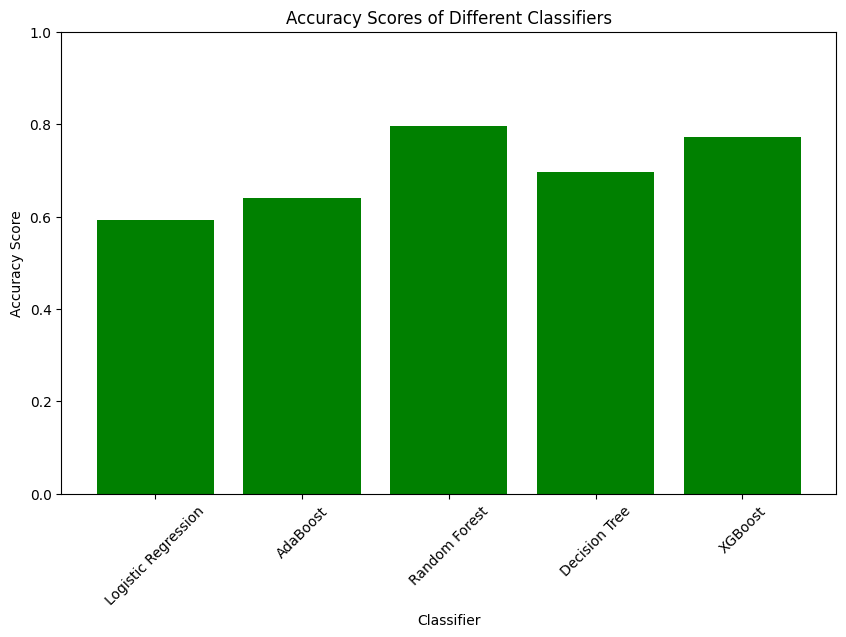

In [21]:
import matplotlib.pyplot as plt

# Accuracy scores
classifiers_names = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, accuracy_values, color='green')
plt.title('Accuracy Scores of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure all values are visible
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [22]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt

# # Define a pipeline with feature scaling and classifier
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', None)  # Classifier will be replaced with specific algorithms
# ])

# # Define classifiers with their respective parameter grids for hyperparameter tuning
# classifiers = {
#     "Logistic Regression": (LogisticRegression(), {
#         'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
#     }),
#     "AdaBoost": (AdaBoostClassifier(), {
#         'classifier__n_estimators': [50, 100, 200]
#     }),
#     "Random Forest": (RandomForestClassifier(), {
#         'classifier__n_estimators': [100, 200, 300],
#         'classifier__max_depth': [None, 10, 20, 30]
#     }),
#     "Decision Tree": (DecisionTreeClassifier(), {
#         'classifier__max_depth': [None, 10, 20, 30]
#     }),
#     "XGBoost": (xgb.XGBClassifier(), {
#         'classifier__n_estimators': [50, 100, 200],
#         'classifier__max_depth': [3, 5, 7],
#         'classifier__learning_rate': [0.01, 0.1, 0.2]
#     })
# }



In [22]:
# # Dictionary to store accuracy scores
# accuracy_scores = {}

# # Iterate over classifiers
# for name, (clf, param_grid) in classifiers.items():
#     # Set parameters for the classifier in the pipeline
#     pipeline.set_params(classifier=clf)

#     # Perform GridSearchCV for hyperparameter tuning
#     grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
#     grid_search.fit(X_train, y_train)

#     # Get the best classifier and its accuracy
#     best_clf = grid_search.best_estimator_
#     accuracy_scores[name] = grid_search.best_score_
#     print(f"Best parameters for {name}: {grid_search.best_params_}")

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
# plt.title('Accuracy Scores of Different Classifiers after Hyperparameter Tuning')
# plt.xlabel('Classifier')
# plt.ylabel('Accuracy Score')
# plt.ylim(0, 1)
# plt.xticks(rotation=45)
# plt.show()


Best parameters for Logistic Regression: {'classifier__C': 10}


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-021dadddf452>", line 11, in <cell line: 5>
    grid_search.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1918, in __call__
    return

TypeError: object of type 'NoneType' has no len()